In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from FRCfuncs import *
from scipy.optimize import curve_fit

## Images generated from averaging five linescans

In [3]:
t0 = time.time()
wdir = r'N:\Singlem\singlem19-1\March\06_FRC_20nmCrimson_NV'
powers = np.arange(0,101,10)
#Data will be stored in a list. Each entry of list contains 3D image of type numpy array.
imStackLst = []
for power in powers:
    ext = r'STEDPowerSeries\5linescans\{0:d}pct_imA_tac26-200\Red Photons\Frames_    0-    0.txt'.format(power)
    filedirA = os.path.join(wdir, ext)
    ext = r'STEDPowerSeries\5linescans\{0:d}pct_imB_tac26-200\Red Photons\Frames_    0-    0.txt'.format(power)
    filedirB = os.path.join(wdir, ext)
    imA, imB = readtxt(filedirA, filedirB)
    imStackLst.append ([imA, imB])
t1 = time.time()
print ("computational time equals: " + str( t1 - t0))

computational time equals: 7.950673818588257


applied drift correction of 0.335774 nm in x and and 6.414239 nm in y.



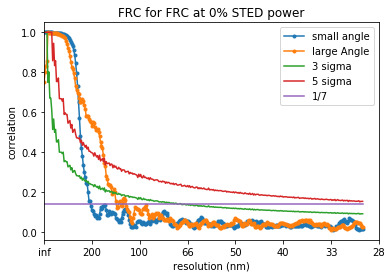

retrieved resolution for FRC at 0% STED power is: 132nm

small angle resolution is 204.489796
applied drift correction of -0.525393 nm in x and and 6.780608 nm in y.



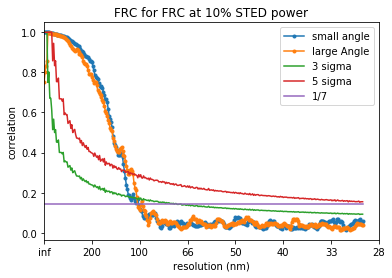

retrieved resolution for FRC at 10% STED power is: 102nm

small angle resolution is 101.212121
applied drift correction of -0.428302 nm in x and and 7.534957 nm in y.



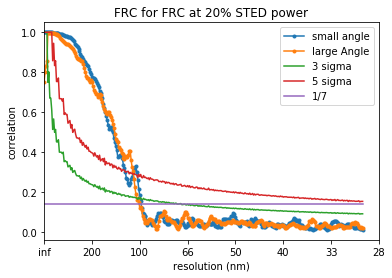

retrieved resolution for FRC at 20% STED power is: 100nm

small angle resolution is 98.235294
applied drift correction of 0.786577 nm in x and and 7.585381 nm in y.



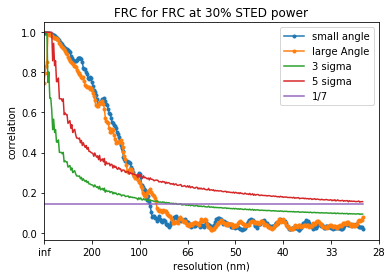

retrieved resolution for FRC at 30% STED power is: 85nm

small angle resolution is 90.270270
applied drift correction of 0.139220 nm in x and and 7.146562 nm in y.



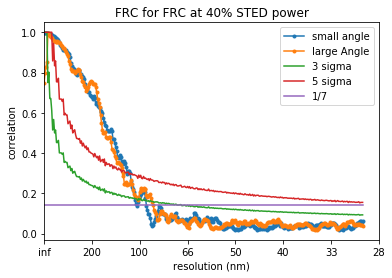

retrieved resolution for FRC at 40% STED power is: 87nm

small angle resolution is 103.298969
applied drift correction of 0.263693 nm in x and and 6.123277 nm in y.



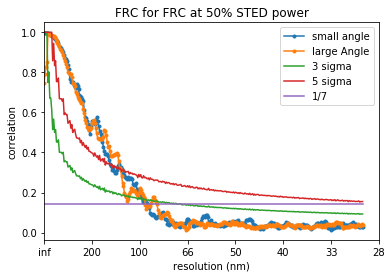

retrieved resolution for FRC at 50% STED power is: 95nm

small angle resolution is 93.644860
applied drift correction of 0.498998 nm in x and and 6.890675 nm in y.



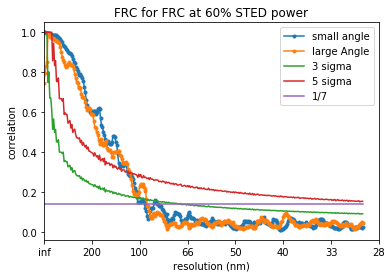

retrieved resolution for FRC at 60% STED power is: 93nm

small angle resolution is 95.428571
applied drift correction of -1.114505 nm in x and and 6.911628 nm in y.



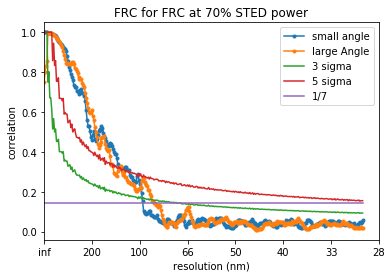

retrieved resolution for FRC at 70% STED power is: 87nm

small angle resolution is 96.346154
applied drift correction of -0.101637 nm in x and and 7.052306 nm in y.



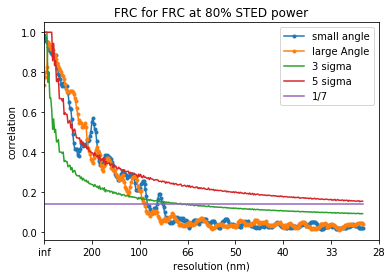

retrieved resolution for FRC at 80% STED power is: 95nm

small angle resolution is 92.777778
applied drift correction of 1.212863 nm in x and and 7.084282 nm in y.



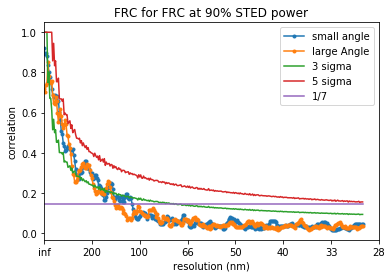

retrieved resolution for FRC at 90% STED power is: 135nm

small angle resolution is 108.913043
applied drift correction of 0.389597 nm in x and and 6.825444 nm in y.



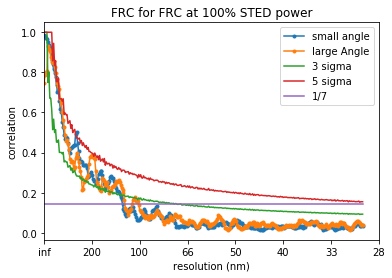

retrieved resolution for FRC at 100% STED power is: 118nm

small angle resolution is 120.722892


In [6]:
Nimg = len(powers)
FRC = np.zeros(Nimg)
sFRC = np.zeros(Nimg)
Bleaching = np.zeros(Nimg)
BleachingSigma = np.zeros(Nimg)
for i, imStack in enumerate(imStackLst):
    power = powers[i]
    imA = imStack[0]
    imB = imStack[1]
    smallAngles, largeAngles, __, __, sres, lres = FRCAnalysis(imA, imB, 15, theta =np.pi/4, title = "FRC at " + str(power) + "% STED power")
    print("small angle resolution is %f" % sres[0,0])
    FRC[i] = lres[0,0]
    sFRC[i] = sres[0,0]

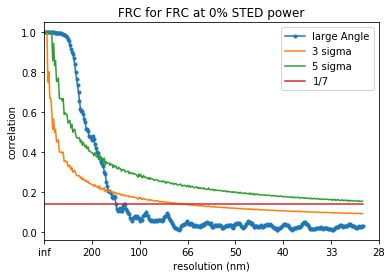

retrieved resolution for FRC at 0% STED power is: 134nm

[[133.6         76.        ]
 [149.55223881  68.        ]
 [172.75862069  59.        ]]


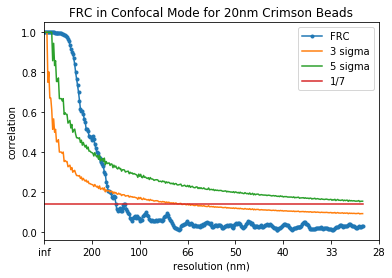

In [34]:
imAB = imStackLst[0]
power = 0
imA = np.sum(imAB[::2], axis = 0)
imB = np.sum(imAB[1::2], axis =0)
__, FRC, threeSigma, fiveSigma, __, res = FRCAnalysis(imA, imB, 15, title = "FRC at " + str(power) + "% STED power")
pixelSize = 15
largeAngles = FRC
title = "FRC in Confocal Mode for 20nm Crimson Beads"
smallAngles = None
print (res) 
d = threeSigma.shape[0]
if (smallAngles is not None):
    plt.plot(smallAngles, '.-', label = 'small angle')
plt.plot(largeAngles, '.-', label = 'FRC')
plt.plot(threeSigma, label = '3 sigma')
plt.plot(fiveSigma, label = '5 sigma')
plt.plot(np.ones(d) / 7, label = '1/7')
plt.legend()
plt.title(title)
plt.ylabel('correlation')
plt.xlabel('resolution (nm)')
plt.gca().set_xlim(left = 0)
#set custom x ticks
locs, labels = plt.xticks()

for i in range(locs.shape[0]):
    if locs[i] == 0:
        labels[i] = 'inf'
    else:
        labels[i] = (2 * d * pixelSize / locs[i]).astype(np.int)
plt.xticks(locs, labels)
plt.savefig("20nmCrimsonCF_FRC.png", dpi = 300)
plt.show()

In [8]:
def inversesqrt(x, ConfocalRes, Is):
    return ConfocalRes/(1+np.sqrt(x)/Is)

def fitSTEDpower(STEDpower, STEDresolution, p0 = (240,10)):
    return curve_fit(inversesqrt, STEDpower, STEDresolution, p0 = p0)


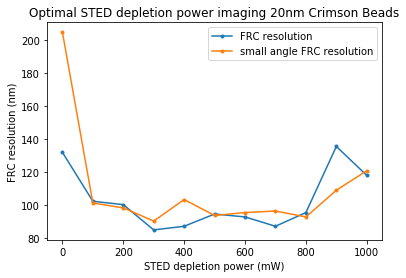

In [9]:
STEDpowers = powers*10
#popt, pcov = fitSTEDpower(STEDpowers, FRC)
#fitFRC = inversesqrt(STEDpowers, popt[0], popt[1])
plt.plot(STEDpowers,FRC, '.-', label = 'FRC resolution')
plt.plot(STEDpowers,sFRC, '.-', label = 'small angle FRC resolution')
#plt.plot(STEDpowers, fitFRC, '--', label = 'fit A/(1 + I_STED / I_s)')
plt.xlabel('STED depletion power (mW)')
plt.ylabel('FRC resolution (nm)')
plt.title('Optimal STED depletion power imaging 20nm Crimson Beads')
plt.legend()
plt.savefig("20nmCrimsonSTEDpowerSeriesFRC.png", dpi = 300)
plt.show()


## Images generated from a single linescan

In [4]:
t0 = time.time()
wdir = r'N:\Singlem\singlem19-1\March\06_FRC_20nmCrimson_NV'
powers = np.arange(0,101,10)
#Data will be stored in a list. Each entry of list contains 3D image of type numpy array.
imStackLst = []
for power in powers:
    ext = r'STEDPowerSeries\{0:d}pct_imA_tac26-200_linescan1\Red Photons\Frames_    0-    0.txt'.format(power)
    filedirA = os.path.join(wdir, ext)
    ext = r'STEDPowerSeries\{0:d}pct_imB_tac26-200_linescan2\Red Photons\Frames_    0-    0.txt'.format(power)
    filedirB = os.path.join(wdir, ext)
    imA, imB = readtxt(filedirA, filedirB)
    imStackLst.append ([imA, imB])
t1 = time.time()
print ("computational time equals: " + str( t1 - t0))

computational time equals: 7.4082019329071045


applied drift correction of -1.520691 nm in x and and 1.886382 nm in y.



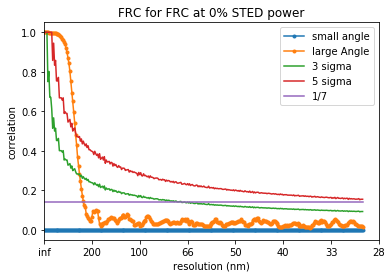

retrieved resolution for FRC at 0% STED power is: 239nm

small angle resolution is -1.000000
applied drift correction of 1.875343 nm in x and and -1.286339 nm in y.



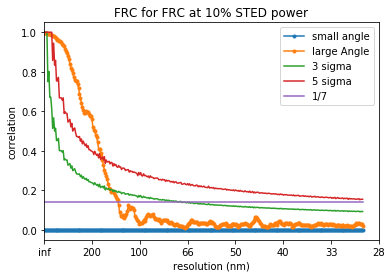

retrieved resolution for FRC at 10% STED power is: 128nm

small angle resolution is -1.000000
applied drift correction of 0.986188 nm in x and and 4.226978 nm in y.



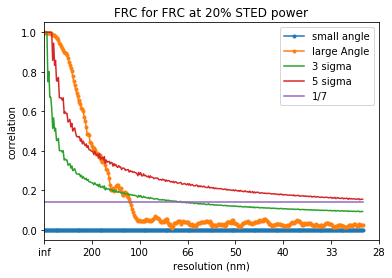

retrieved resolution for FRC at 20% STED power is: 111nm

small angle resolution is -1.000000
applied drift correction of 1.109719 nm in x and and 0.508110 nm in y.



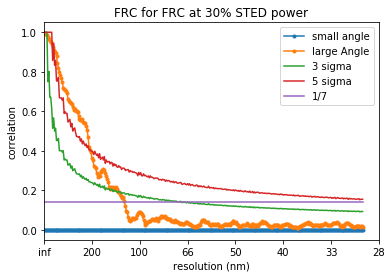

retrieved resolution for FRC at 30% STED power is: 118nm

small angle resolution is -1.000000
applied drift correction of 0.048350 nm in x and and 1.278373 nm in y.



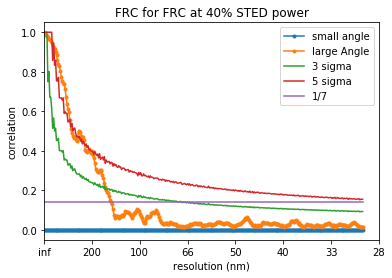

retrieved resolution for FRC at 40% STED power is: 143nm

small angle resolution is -1.000000
applied drift correction of -4.873201 nm in x and and -0.781915 nm in y.



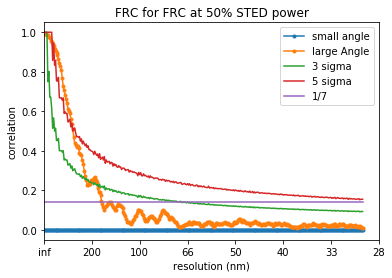

retrieved resolution for FRC at 50% STED power is: 164nm

small angle resolution is -1.000000
applied drift correction of -2.819734 nm in x and and 0.126573 nm in y.



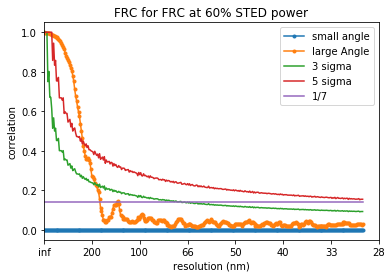

retrieved resolution for FRC at 60% STED power is: 170nm

small angle resolution is -1.000000
applied drift correction of 3.100866 nm in x and and 1.784467 nm in y.



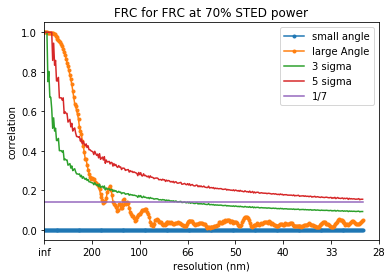

retrieved resolution for FRC at 70% STED power is: 162nm

small angle resolution is -1.000000
applied drift correction of -0.084678 nm in x and and 0.195896 nm in y.



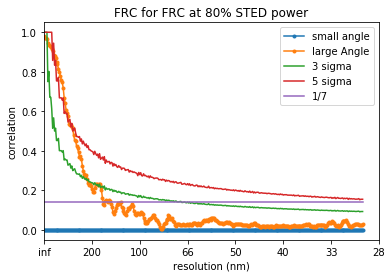

retrieved resolution for FRC at 80% STED power is: 162nm

small angle resolution is -1.000000
applied drift correction of -1.268801 nm in x and and 4.606936 nm in y.



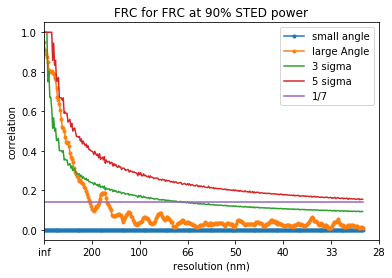

retrieved resolution for FRC at 90% STED power is: 209nm

small angle resolution is -1.000000
applied drift correction of -1.739981 nm in x and and 2.091620 nm in y.



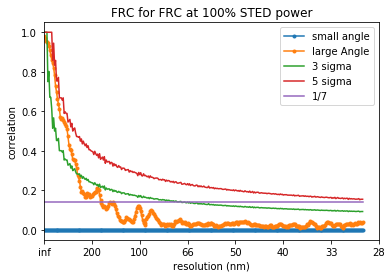

retrieved resolution for FRC at 100% STED power is: 167nm

small angle resolution is -1.000000


In [15]:
Nimg = len(powers)
FRC = np.zeros(Nimg)
sFRC = np.zeros(Nimg)
Bleaching = np.zeros(Nimg)
BleachingSigma = np.zeros(Nimg)
for i, imStack in enumerate(imStackLst):
    power = powers[i]
    imA = imStack[0]
    imB = imStack[1]
    smallAngles, largeAngles, __, __, sres, lres = FRCAnalysis(imA, imB, 15, theta = 0, title = "FRC at " + str(power) + "% STED power")
    print("small angle resolution is %f" % sres[0,0])
    FRC[i] = lres[0,0]
    sFRC[i] = sres[0,0]

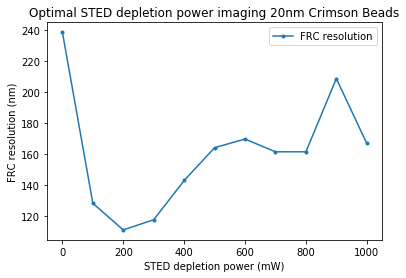

In [16]:
STEDpowers = powers*10
#popt, pcov = fitSTEDpower(STEDpowers, FRC)
#fitFRC = inversesqrt(STEDpowers, popt[0], popt[1])
plt.plot(STEDpowers,FRC, '.-', label = 'FRC resolution')
#plt.plot(STEDpowers,sFRC, '.-', label = 'small angle FRC resolution')
#plt.plot(STEDpowers, fitFRC, '--', label = 'fit A/(1 + I_STED / I_s)')
plt.xlabel('STED depletion power (mW)')
plt.ylabel('FRC resolution (nm)')
plt.title('Optimal STED depletion power imaging 20nm Crimson Beads')
plt.legend()
plt.savefig("20nmCrimsonSTEDpowerSeriesFRC_single_linescan.png", dpi = 300)
plt.show()


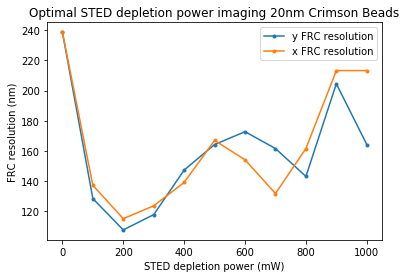

In [14]:
STEDpowers = powers*10
#popt, pcov = fitSTEDpower(STEDpowers, FRC)
#fitFRC = inversesqrt(STEDpowers, popt[0], popt[1])
plt.plot(STEDpowers,FRC, '.-', label = 'y FRC resolution')
plt.plot(STEDpowers,sFRC, '.-', label = 'x FRC resolution')
#plt.plot(STEDpowers, fitFRC, '--', label = 'fit A/(1 + I_STED / I_s)')
plt.xlabel('STED depletion power (mW)')
plt.ylabel('FRC resolution (nm)')
plt.title('Optimal STED depletion power imaging 20nm Crimson Beads')
plt.legend()
plt.savefig("20nmCrimsonSTEDpowerSeriesFRC.png", dpi = 300)
plt.show()
